In [89]:
from importlib import reload
from slr import connect
from slr import scenariopack
reload(connect)
reload(scenariopack)
import matplotlib.pyplot as plt

In [90]:
sf = scenariopack.ScenarioPack.from_index(0)
sf

Sea level rise at San Francisco, CA; 3 Scenario(s) available

In [91]:
hs = connect.HistoricalSLR.from_scenariopack(scenariopack=sf)

In [92]:
hs.noaa_properties(format='narrative')

'Historical sea-level rise information was retrieved at NOAA Station 9414290 operated by NOAA CO-OPS. The relative sea level trend at that location reads 1.97 mm per year with a 95% confidence interval of +/- 0.09 mm based on monthly mean sea level data from 1897 to 2020 (approximately 123 years in total). This is equivalent to a change of 197.0 mm in 100 years.'

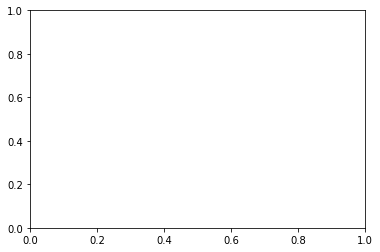

In [75]:
fig, ax = plt.subplots(1, 1)


In [71]:
hs.trend_units

'mm'

In [72]:
hs.end_date

Timestamp('2020-12-15 00:00:00')

In [73]:
hs.start_date.asm8

numpy.datetime64('1897-08-01T00:00:00.000000000')